### Notas de Daniel Salgado (CNS - IPICyT) para el curso Introducción a la programación y al aprendizaje de máquinas con Python (2020) 

# Pimp my ride

En esta sección veremos algunas herramientas extras, útiles para trabajar con Python

### Scipy

Provee muchas rutinas numéricas eficientes. Sus funciones lo hacen tener un caracter más general que numpy. De acuerdo a la página de scipy.org (https://www.scipy.org/scipylib/faq.html#general-questions-about-scipy):

"*In an ideal world, NumPy would contain nothing but the array data type and the most basic operations: indexing, sorting, reshaping, basic elementwise functions, et cetera. All numerical code would reside in SciPy. However, one of NumPy’s important goals is compatibility, so NumPy tries to retain all features supported by either of its predecessors. Thus NumPy contains some linear algebra functions, even though these more properly belong in SciPy. In any case, SciPy contains more fully-featured versions of the linear algebra modules, as well as many other numerical algorithms. If you are doing scientific computing with python, you should probably install both NumPy and SciPy. Most new features belong in SciPy rather than NumPy*"

Dos ejemplos de las MUCHAS funciones que contiene el módulo Scipy

In [15]:
# Integrar numéricamente (ejemplo tomado de:
# https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/integrate.html)

from scipy.integrate import quad

# Compute a definite integral.
# Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.

def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b)) # Los parámetros de la función se incluyen en args
print(I)


(1.6666666666666667, 1.8503717077085944e-14)


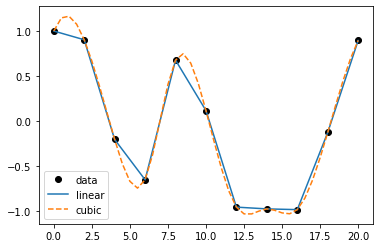

In [35]:
# Interpolar una función. Ejemplo tomado de 
# (https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/interpolate.html)

from scipy.interpolate import interp1d

# Interpolate a 1-D function.

x = np.linspace(0, 20, num=11, endpoint=True)  # Genero un arreglo con 11 ptos
y = np.cos(-x**2/9.0)                          # Genero valores de la función en los ptos de X (¡sin ciclos!)
f = interp1d(x, y)                             # Utilizo scipy para generar función a partir de interpolar ptos
f2 = interp1d(x, y, kind='cubic')              # Otro criterio para la interpolación

xnew = np.linspace(0, 20, num=41, endpoint=True)

# Veo la gráfica de puntos originales y los generados al interpolar la función

import matplotlib.pyplot as plt
plt.plot(x, y, 'ko', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

### Sympy

Biblioteca que permite realizar matemáticas simbólicas. 
https://www.sympy.org/en/index.html  

Un tutorial:  
https://docs.sympy.org/latest/tutorial/index.html

In [7]:
# Importo módulo y defino variables (si no las defino, provoco un error al usarlas)
import sympy

x, y, z, t = sympy.symbols('x y z t')   # Variables en la expresión

In [10]:
# Puedo realizar operación con fracciones
medio = sympy.Rational(1,2)
tcua  = sympy.Rational(3,4)
res = 1 + medio
print(res)
print("{} + {} = {}".format(medio, tcua, medio + tcua))

3/2
1/2 + 3/4 = 5/4


__Ejemplo__ Asigna a una variable la expresión $1 + \exp(\frac{-(3x^2)}{4})$ , e imprimela

1 + exp(-3*x**2/4)


__Ejemplo__ Evalúa la expresión anterior para x = $\pi$

In [12]:
# Ver función subs 
import numpy as np


1.00060990747001


__Ejemplo__ Obtén la derivada de $1 + \exp(\frac{-(3x^2)}{4})$ con respecto a $x$, e imprímela

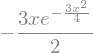

In [17]:
# Ver función diff 


__Ejemplo__ Obtén la integral de $1 + \exp(-x^2)$ con respecto a $x^2$, e imprímela

In [24]:
# Ver función integrate y poner atención a las variables


__Ejemplo__ Simplifica la expresión $\frac{3x}{8} + \frac{7x}{4} - 2x$

In [30]:
# Ver función simplify


### Numba

Numba es un proyecto _open source_ que permite opitimizar funciones de Python al tiempo de correrlas (compilación justo a tiempo). Este módulo "traduce" código de Python en código máquina, ya sea para CPUs o GPUs.

http://numba.pydata.org/

Tomemos como ejemplo una función para calcular la diferencia promedio entre dos conjuntos de valores. Una función utilizando numpy y otra sin numpy.

In [37]:
import numpy as np

# Función sin numpy
def dif_prom(x, y):
    res = 0.0
    for i in range(len(x)): # supongo que x e y son del mismo tamaño
        res += x[i] - y[i]
    return res/float(len(x))

# Comparar el tiempo de ejecución de ambas funciones con los arreglos de datos
x = np.random.randn(1000000)
y = np.random.randn(1000000)

%timeit dif_prom(x, y)
# en numpy ya existe la función mean
%timeit (x - y).mean()

465 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.28 ms ± 39.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Ahora utilizo numba para compilar la función que no utiliza numpy. Observa que es muy fácil pedir que se compile la función.

In [38]:
import numba as nb

funumba_difprom = nb.jit(dif_prom)

%timeit funumba_difprom(x, y)

1.84 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


En mi caso, esta función es incluso más rápida que la función que utiliza numpy.

Otra forma de generar funciones compiladas, es utilizando un decorador

In [60]:
# Ejemplo. Optimicemos una función que calcule distancia entre dos puntos.

import numba as nb
import numpy as np

def dist(ri, rj):
    return np.linalg.norm(ri - rj)


@nb.jit (nopython=True) # Set "nopython" mode for best performance
def nb_dist(ri, rj):
    dicu = (ri - rj)*(ri - rj)
    res  = dicu[0] + dicu[1] + dicu[2]
    return np.sqrt(res)


In [64]:
# Ahora las comparo
v1 = np.array([10,2,0])
v2 = np.array([0,2,0])

print(dist(v1, v2), nb_dist(v1, v2))

print("Primero función normal: ")
%timeit dist(v1, v2)

print("Ahora función con jit:")  # Observar cambio de tiempo al ejecutar por más de una ocasión.
%timeit nb_dist(v1, v2)

10.0 10.0
Primero función normal: 
5.8 µs ± 60 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Ahora función con jit:
413 ns ± 2.51 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Pandas

Es una biblioteca que permite utilizar estrucutras para manejo y análisis de datos de forma eficiente (está construida sobre numpy).

https://pandas.pydata.org/

Veamos un ejemplo con la siguiente tabla (que tomé de la red sin permiso pero sin fines de lucro ni malas itenciones):

<img src="./Table-29.jpg" width="400" height="400" />

In [65]:
# Es más fácil manejar arreglos de datos con pandas (y está diseñado para ser de alto desempeño)
import pandas as pd

# Una serie en panda es un arreglo unidimensional capaz de recibir datos de cualquier tipo
# s = pd.Series(data, index=index) <- sintaxis

torneos = ["Oz Open", "French Open", "Wimbledon", "Us Open"]
s1 = pd.Series([11, 5, 3, 5], index=torneos)  # Creo una serie, donde los índices son los nombres de los torneos

print(s1.sum(), s1.mean())

# Ahora hago series para las 4 primeras jugadoras de la lista
s2 = pd.Series([7, 3, 7, 6], index=torneos)
s3 = pd.Series([4, 6, 7, 5], index=torneos) 
s4 = pd.Series(['na', 4, 8, 7], index=torneos) 

# Y las junto en un diccionario
diccData = {'Margaret':s1, 'Serena':s2, 'Steffi':s3, 'Helen':s4}

# Ahora hago un arreglo bidimensional (tabla) con esos datos
df1 = pd.DataFrame(diccData)
print(df1)

24 6.0
             Margaret  Serena  Steffi Helen
Oz Open            11       7       4    na
French Open         5       3       6     4
Wimbledon           3       7       7     8
Us Open             5       6       5     7
